In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as DT
import sklearn.model_selection as ms
import sklearn.tree as tr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns


In [2]:
Heart=pd.read_csv('heart.csv')
print(Heart)
Heart_x=Heart.drop(columns=['output'])
print(Heart_x)
x=Heart_x
print(x)
y=Heart.output
print(y)
train_x, test_x, train_y, test_y=ms.train_test_split(x,y,train_size=0.8, random_state=42)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

0.9586776859504132
0.8688524590163934
|--- feature_2 <= 0.50
|   |--- feature_11 <= 0.50
|   |   |--- feature_8 <= 0.50
|   |   |   |--- feature_12 <= 2.50
|   |   |   |   |--- feature_4 <= 316.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  316.50
|   |   |   |   |   |--- feature_9 <= 0.60
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_9 >  0.60
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_12 >  2.50
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |--- feature_9 <= 0.85
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_9 >  0.85
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_8 >  0.50
|   |   |   |--- feature_9 <= 0.70
|   |   |   |   |--- feature_7 <= 147.50
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |

[Text(0.6322674418604651, 0.9285714285714286, 'x[2] <= 0.5\ngini = 0.495\nsamples = 242\nvalue = [109, 133]'),
 Text(0.3808139534883721, 0.7857142857142857, 'x[11] <= 0.5\ngini = 0.413\nsamples = 110\nvalue = [78, 32]'),
 Text(0.22674418604651161, 0.6428571428571429, 'x[8] <= 0.5\ngini = 0.498\nsamples = 53\nvalue = [25, 28]'),
 Text(0.09302325581395349, 0.5, 'x[12] <= 2.5\ngini = 0.302\nsamples = 27\nvalue = [5, 22]'),
 Text(0.046511627906976744, 0.35714285714285715, 'x[4] <= 316.5\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.023255813953488372, 0.21428571428571427, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.06976744186046512, 0.21428571428571427, 'x[9] <= 0.6\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.046511627906976744, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09302325581395349, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.13953488372093023, 0.35714285714285715, 'x[6] <= 0.5\ngini = 0.49\nsamp

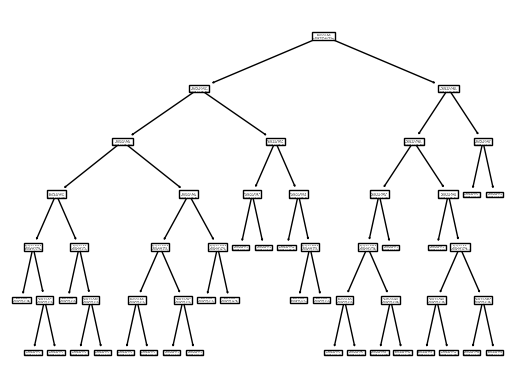

In [3]:
# Decision tree
#Create a Decision Tree classifier with the current max_depth
from sklearn import tree
D_T=tr.DecisionTreeClassifier(max_depth=6)
D_T.fit(train_x,train_y)
Train_Acu=D_T.score(train_x,train_y)
Test_Acu=D_T.score(test_x,test_y)
pred_y = D_T.predict(test_x)

print(Train_Acu)
print(Test_Acu)
model_D_T = D_T.fit(train_x, train_y)
text_representation = tr.export_text(D_T)
print(text_representation)

# To Visualize Decision Tree
tree.plot_tree(model_D_T)



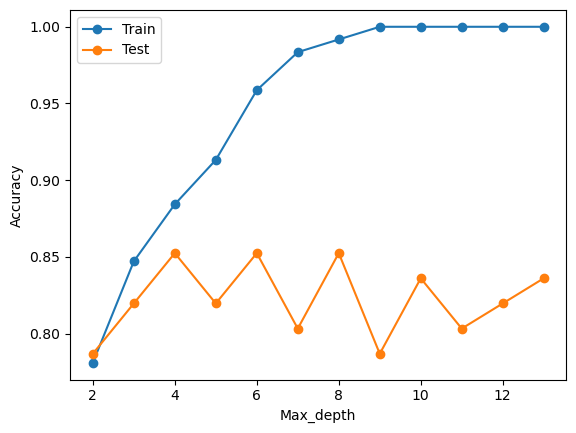

In [4]:
# Decision tree
Train_Acu=[]
Test_Acu=[]
MD=[]

for i in range(2,14):
    #Create a Decision Tree classifier with the current max_depth
    D_T=tr.DecisionTreeClassifier(max_depth=i)
    D_T.fit(train_x,train_y)
    Train_Acu.append(D_T.score(train_x,train_y))
    Test_Acu.append(D_T.score(test_x,test_y))
    MD.append(i)


plt.figure()
plt.plot(MD, Train_Acu, label='Train',marker='o')
plt.plot(MD, Test_Acu, label='Test', marker='o')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



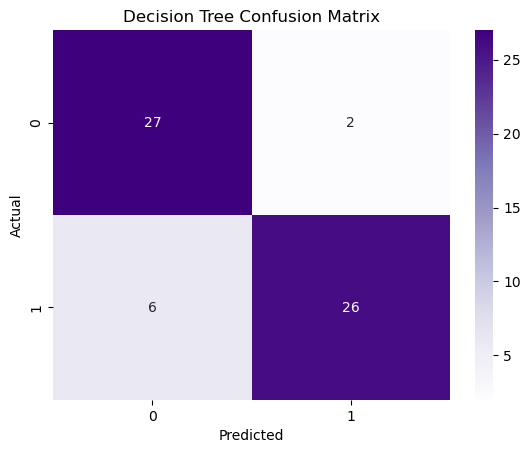

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [37]:
D_T_CM = confusion_matrix(test_y, pred_y)
plt.figure()
sns.heatmap(D_T_CM, annot=True, cmap='Purples')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Generate a classification report
class_report = classification_report(test_y, pred_y)
print("Classification Report:\n", class_report)

In [6]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

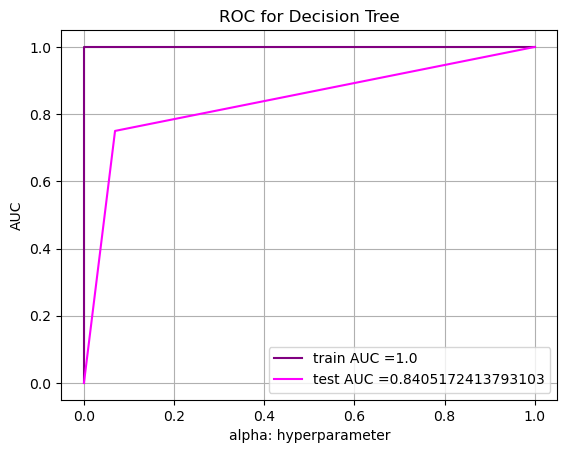

In [28]:
from sklearn.metrics import roc_curve, auc

y_train_pred = batch_predict(D_T, train_x)    
y_test_pred = batch_predict(D_T, test_x)

train_fpr, train_tpr, tr_thresholds = roc_curve(train_y, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(test_y, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)),color='Purple')
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)),color='Magenta')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC for Decision Tree")
plt.grid()
plt.show()

In [8]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
Model_LR = LogisticRegression()
Model_LR.fit(train_x,train_y)

predicted_lR=Model_LR.predict(test_x)
conf = confusion_matrix(test_y, predicted_lR)
Train_Acu_lr=Model_LR.score(train_x,train_y)
Test_Acu_lr=Model_LR.score(test_x,test_y)

print ("Confusion Matrix : \n", conf)
print(Train_Acu_lr)
print(Test_Acu_lr)
print ("The accuracy of Logistic Regression is : ", accuracy_score(test_y, predicted_lR)*100,"%")

Confusion Matrix : 
 [[25  4]
 [ 3 29]]
0.8553719008264463
0.8852459016393442
The accuracy of Logistic Regression is :  88.52459016393442 %


/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


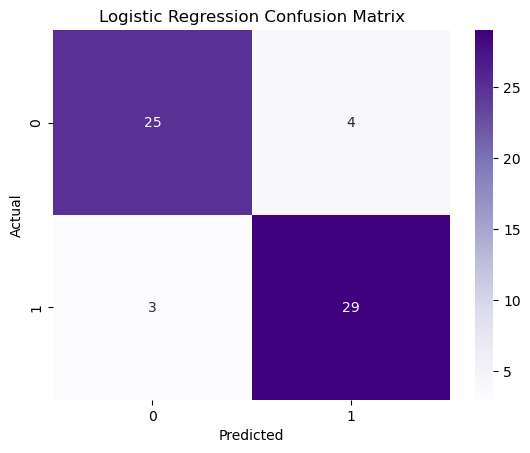

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [38]:
#Making the Confusion Matrix and plotting it
Model_LR_CM = confusion_matrix(test_y, predicted_lR)
plt.figure()
sns.heatmap(Model_LR_CM, annot=True,cmap='Purples')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate a classification report
class_report = classification_report(test_y, predicted_lR)
print("Classification Report:\n", class_report)

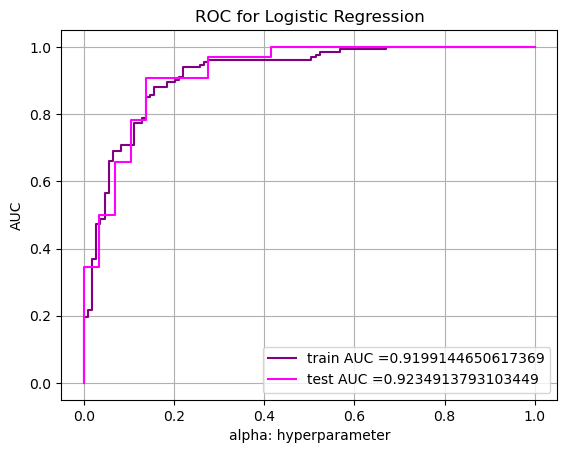

In [29]:
from sklearn.metrics import roc_curve, auc

y_train_pred = batch_predict(Model_LR, train_x)    
y_test_pred = batch_predict(Model_LR, test_x)

train_fpr, train_tpr, tr_thresholds = roc_curve(train_y, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(test_y, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)),color='Purple')
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)),color='Magenta')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC for Logistic Regression")
plt.grid()
plt.show()

In [33]:
#SVM

from sklearn.svm import SVC

model_SVC = SVC(kernel='linear', random_state=42,probability=True).fit(train_x,train_y)
train=model_SVC.score(train_x,train_y)
test=model_SVC.score(test_x,test_y)
predicted_SVC = model_SVC.predict(test_x)
print(train)
print(test)
print("The accuracy of SVM is : ", accuracy_score(test_y, predicted_SVC)*100, "%")

0.8636363636363636
0.8688524590163934
The accuracy of SVM is :  86.88524590163934 %


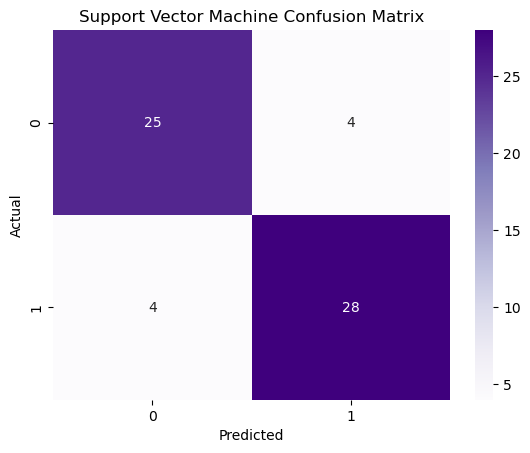

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [39]:
#Making the Confusion Matrix and plotting it
model_SVC_c = confusion_matrix(test_y, predicted_SVC)
plt.figure()
sns.heatmap(model_SVC_c, annot=True, cmap='Purples')
plt.title('Support Vector Machine Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Generate a classification report
class_report = classification_report(test_y, predicted_SVC)
print("Classification Report:\n", class_report)

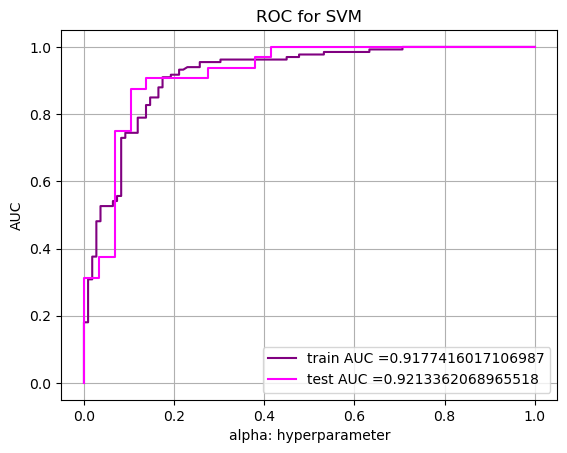

In [30]:
from sklearn.metrics import roc_curve, auc

y_train_pred = batch_predict(model_SVC, train_x)    
y_test_pred = batch_predict(model_SVC, test_x)

train_fpr, train_tpr, tr_thresholds = roc_curve(train_y, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(test_y, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)),color='Purple')
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)),color='Magenta')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC for SVM")
plt.grid()
plt.show()

In [15]:
#KNN

best_score = 0.0
best_k = -1
for k in range(1, 11):
    knn_clf_sk = KNeighborsClassifier(n_neighbors=k)
    knn_clf_sk.fit(train_x, train_y)
    score = knn_clf_sk.score(test_x, test_y)
    if score > best_score:
        best_k = k
        best_score = score

print("best_k = " + str(best_k))
print("best_score = " + str(best_score))

best_k = 6
best_score = 0.7213114754098361


In [22]:
from sklearn.neighbors import KNeighborsClassifier  

model_knn= KNeighborsClassifier(n_neighbors =6)  
model_knn.fit(train_x, train_y)
predicted_y_knn = model_knn.predict(test_x)
train_knn=model_knn.score(train_x,train_y)
test_knn=model_knn.score(test_x,test_y)
print(train_knn)
print(test_knn)
print(confusion_matrix(test_y, predicted_y_knn))
print("The accuracy of KNN is : ", accuracy_score(test_y, predicted_y_knn.round())*100, "%")


0.7520661157024794
0.7213114754098361
[[21  8]
 [ 9 23]]
The accuracy of KNN is :  72.1311475409836 %


Text(0, 0.5, 'Error Rate')

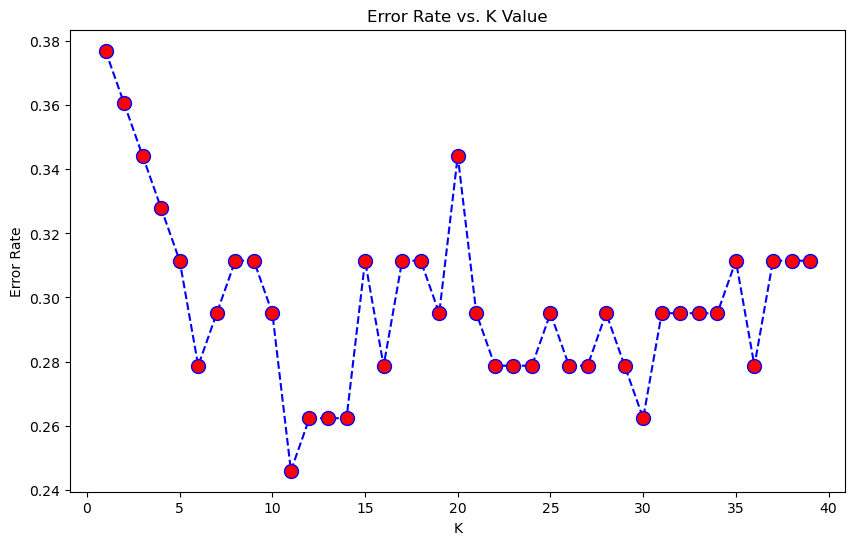

In [23]:
import numpy as np
error_rate = []
  
for i in range(1, 40):
      
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_x, train_y)
    pred_i = model.predict(test_x)
    error_rate.append(np.mean(pred_i != test_y))
  
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

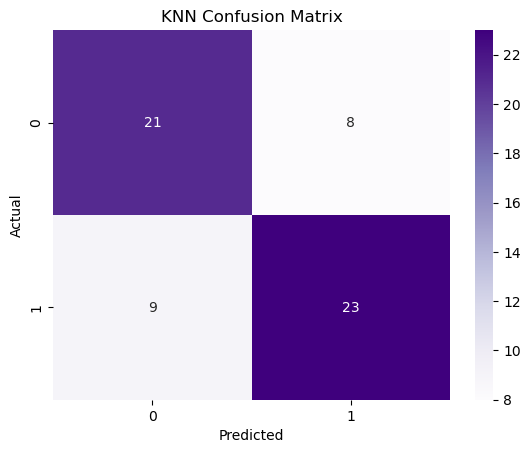

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71        29
           1       0.74      0.72      0.73        32

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [36]:
#Making the Confusion Matrix and plotting it
model_knn_c = confusion_matrix(test_y, predicted_y_knn)
plt.figure()
sns.heatmap(model_knn_c, annot=True, cmap='Purples')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Generate a classification report
class_report = classification_report(test_y, predicted_y_knn)
print("Classification Report:\n", class_report)

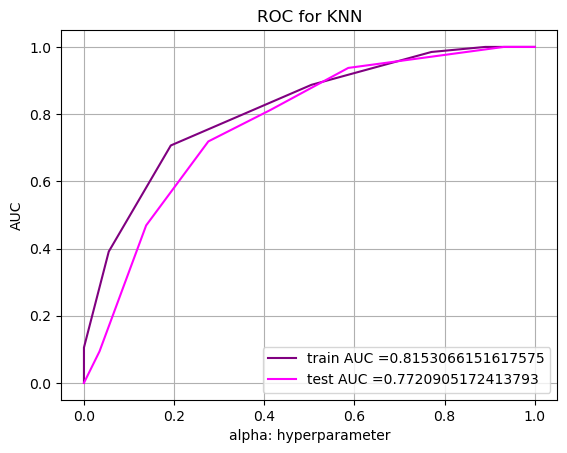

In [31]:
from sklearn.metrics import roc_curve, auc

y_train_pred = batch_predict(model_knn, train_x)    
y_test_pred = batch_predict(model_knn, test_x)

train_fpr, train_tpr, tr_thresholds = roc_curve(train_y, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(test_y, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)),color='Purple')
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)),color='Magenta')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC for KNN")
plt.grid()
plt.show()